# Run Piscis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from piscis import Piscis
from piscis.data import load_datasets
from piscis.downloads import download_dataset
from piscis.utils import pad_and_stack

In [2]:
# Download the Piscis dataset.
download_dataset('20251212', '')

In [3]:
# Load the Piscis test dataset.
test_ds = load_datasets('20251212/A3_GFP1_A594', load_train=False, load_val=False, load_test=True)['test']
images = pad_and_stack(test_ds['x'])
coords = test_ds['y']

In [4]:
# Load the Piscis model.
model = Piscis(model_name='20251212')

In [5]:
# Run the Piscis model.
coords_pred, y = model.predict(images, threshold=0.5, intermediates=True)

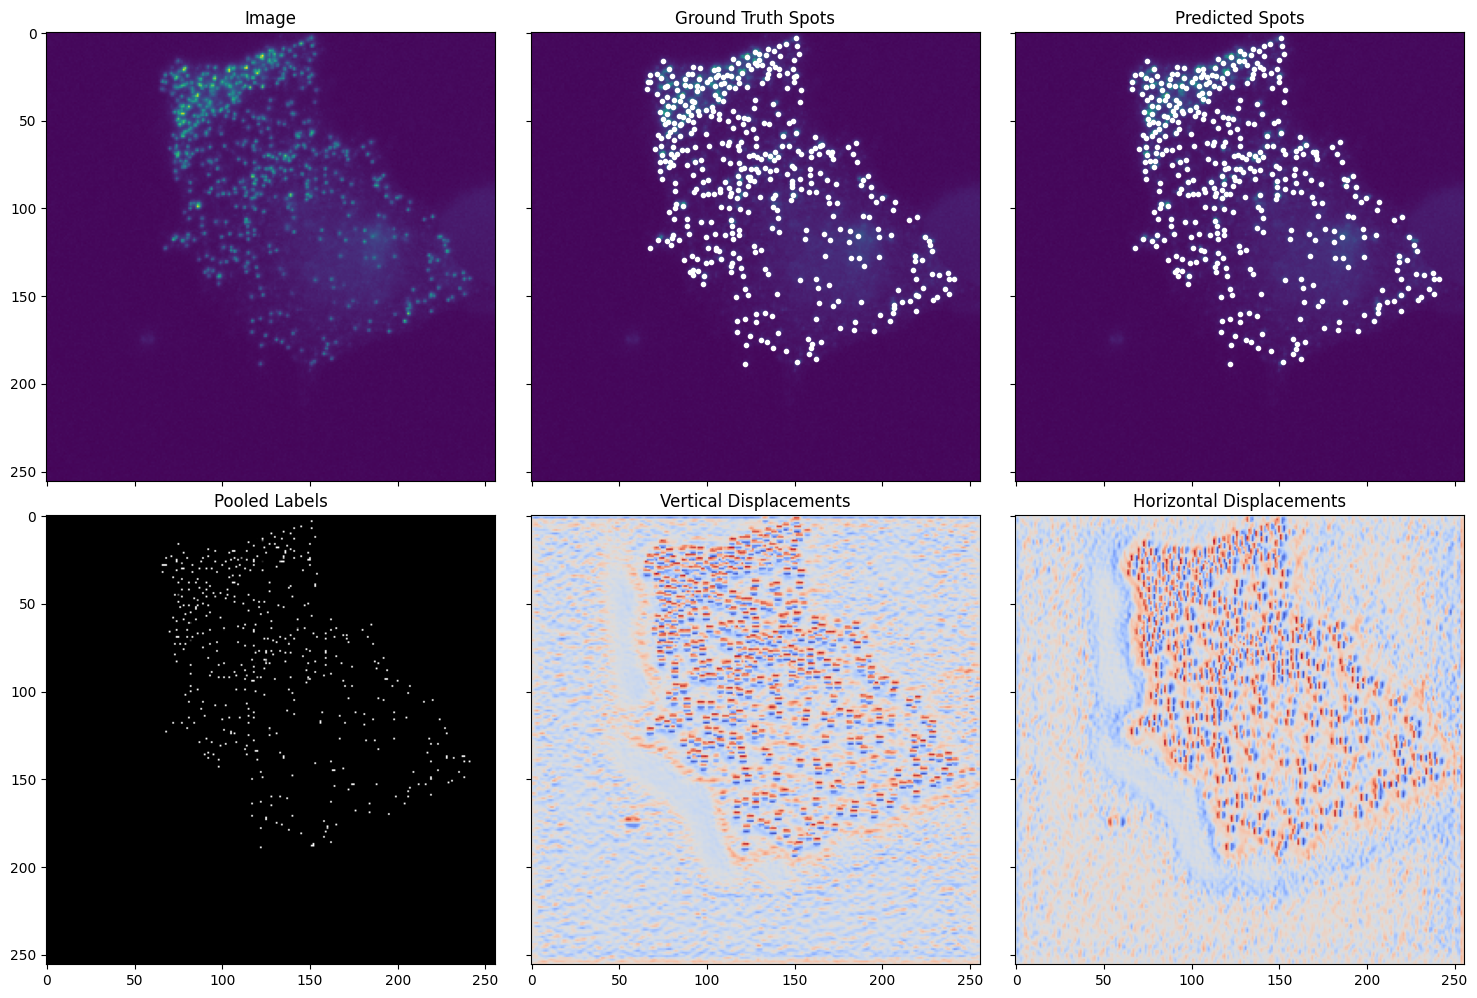

In [6]:
# Plot results.
i = 2

fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

axs[0, 0].imshow(images[i])
axs[0, 0].set_title('Image')

axs[0, 1].imshow(images[i])
axs[0, 1].plot(coords[i][:, 1], coords[i][:, 0], '.', c='white')
axs[0, 1].set_title('Ground Truth Spots')

axs[0, 2].imshow(images[i])
axs[0, 2].plot(coords_pred[i][:, 1], coords_pred[i][:, 0], '.', c='white')
axs[0, 2].set_title('Predicted Spots')

axs[1, 0].imshow(y[i, 0], cmap='gray')
axs[1, 0].set_title('Pooled Labels')

axs[1, 1].imshow(y[i, 1], cmap='coolwarm')
axs[1, 1].set_title('Vertical Displacements')

axs[1, 2].imshow(y[i, 2], cmap='coolwarm')
axs[1, 2].set_title('Horizontal Displacements')

plt.tight_layout()